# El Peligro de los Máximos Locales: Probando Hill Climbing

## Introducción

Hasta ahora hemos visto a Hill Climbing funcionar perfectamente: siempre encuentra la solución óptima. Pero esto es porque le hemos dado funciones "amigables" con un solo pico. 

**¿Qué pasa cuando la realidad es más complicada?**

### El Problema Real

En el mundo real, la mayoría de las funciones no tienen un solo máximo suave. Tienen **múltiples picos de diferentes alturas**: algunos más altos, otros más bajos. Y aquí es donde Hill Climbing muestra su **debilidad crítica**.

### El Escenario de Hoy

Vamos a probar Hill Climbing con una función "traicionera":

$$f(x) = x \cdot \sin(4x) + 1.1x$$

Esta función tiene **múltiples máximos locales** en el intervalo [0, 10], pero solo **uno** es el máximo global (el más alto de todos).

### La Ceguera de Hill Climbing

Hill Climbing es como un excursionista **con los ojos vendados**:
- 🚶 Solo puede sentir si el terreno sube o baja a su alrededor
- 🏔️ Siempre camina hacia arriba
- 🛑 Se detiene cuando ya no puede subir más
- 😵 **NO puede ver si hay montañas más altas a lo lejos**

### Lo que Demostraremos

En esta libreta veremos cómo:

1. ⚠️ **El punto de partida determina el destino:** Empezar en diferentes lugares lleva a diferentes resultados
2. 🎲 **La suerte juega un papel:** Puede encontrar el máximo global o quedarse atrapado en uno local
3. 🪤 **Una vez atrapado, no hay escape:** El algoritmo no puede "bajar" para luego "subir más alto"

Esta es la lección más importante sobre Hill Climbing:

> **"Hill Climbing es rápido y simple, pero miope. Su éxito depende de la suerte del punto inicial."**

¡Empecemos a explorar este fascinante problema! 🚀

## 1. Una Función con Múltiples Picos

### La Función Objetivo

$$f(x) = x \cdot \sin(4x) + 1.1x$$

### Anatomía de la Función

Esta función es una combinación de dos componentes:

1. **Componente Oscilante:** $x \cdot \sin(4x)$
   - El término $\sin(4x)$ crea ondas (oscilaciones)
   - El factor $4$ controla la frecuencia (más ondas en menos espacio)
   - La multiplicación por $x$ hace que las ondas crezcan a medida que x aumenta

2. **Tendencia Lineal:** $1.1x$
   - Este término hace que la función tenga una tendencia general creciente
   - Asegura que la función suba en promedio, pero con fluctuaciones

### ¿Por Qué es Problemática?

La combinación de estos dos componentes crea un "paisaje montañoso":
- 🏔️ **Múltiples picos:** Varios máximos locales
- ⛰️ **Diferentes alturas:** Algunos picos son más altos que otros
- 🎯 **Un ganador:** Solo el pico más alto es el máximo global

### El Desafío para Hill Climbing

Si el algoritmo empieza cerca de un pico bajo:
- ✅ Subirá fácilmente hasta ese pico
- ❌ Se detendrá ahí, creyendo que llegó a la cima
- ❌ No sabrá que hay picos más altos en otra parte
- ❌ No podrá "bajar" para explorar otros picos

En la siguiente celda visualizaremos esta función "traicionera" para ver el desafío que representa.

🔍 Análisis de la Función f(x) = x * sin(4*x) + 1.1 * x
📊 Dominio: [0, 10]
🎯 Máximo global aproximado: x ≈ 9.8298, f(x) ≈ 20.6306


C:\Users\marco\AppData\Local\Temp\ipykernel_36316\3075558080.py:120: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\marco\AppData\Local\Temp\ipykernel_36316\3075558080.py:120: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Gustav\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\marco\OneDrive\Desktop\Gustav\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


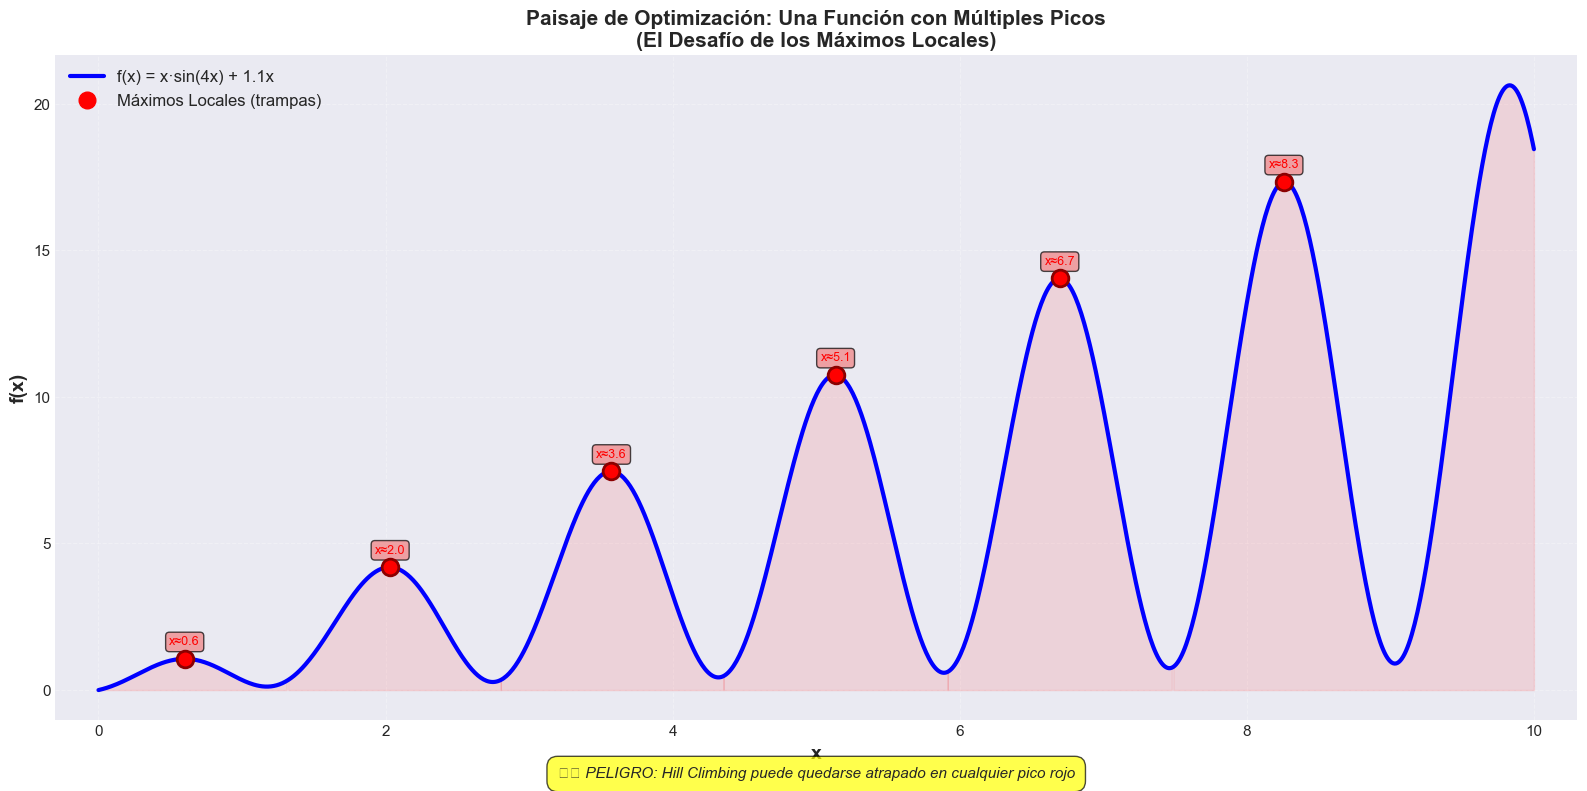


📊 RESUMEN DEL PAISAJE:
   • Total de picos detectados: 6
   • Máximos locales (trampas): 5
   • Máximo global: 1 (en x ≈ 9.83)

⚠️  ADVERTENCIA: Si Hill Climbing empieza cerca de un pico rojo,
    ¡se quedará atrapado ahí y nunca encontrará el pico verde!


In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11

# Definir la función objetivo
def f(x):
    """
    Función objetivo con múltiples máximos locales.
    
    Fórmula: f(x) = x * sin(4*x) + 1.1 * x
    
    Parámetros:
    -----------
    x : float o array
        Valor(es) de x para evaluar la función
        
    Retorna:
    --------
    float o array : Valor(es) de f(x)
    """
    return x * np.sin(4 * x) + 1.1 * x

# Generar valores para visualización de alta resolución
x_valores = np.linspace(0, 10, 1000)  # 1000 puntos para una curva muy suave
y_valores = f(x_valores)

# Encontrar el máximo global aproximado (para referencia)
indice_max_global = np.argmax(y_valores)
x_max_global = x_valores[indice_max_global]
y_max_global = y_valores[indice_max_global]

print("🔍 Análisis de la Función f(x) = x * sin(4*x) + 1.1 * x")
print("="*70)
print(f"📊 Dominio: [0, 10]")
print(f"🎯 Máximo global aproximado: x ≈ {x_max_global:.4f}, f(x) ≈ {y_max_global:.4f}")
print("="*70)

# Crear visualización detallada de la función
plt.figure(figsize=(16, 8))

# Plotear la función
plt.plot(x_valores, y_valores, 'b-', linewidth=3, label='f(x) = x·sin(4x) + 1.1x', zorder=2)

# Identificar y marcar los máximos locales (picos)
# Buscar puntos donde la derivada cambia de positiva a negativa
ventana = 20  # Ventana para detectar picos
picos_locales = []
for i in range(ventana, len(y_valores) - ventana):
    if y_valores[i] == max(y_valores[i-ventana:i+ventana]):
        picos_locales.append((x_valores[i], y_valores[i]))

# Eliminar picos duplicados muy cercanos
picos_filtrados = []
for pico in picos_locales:
    if not picos_filtrados or abs(pico[0] - picos_filtrados[-1][0]) > 0.3:
        picos_filtrados.append(pico)

# Marcar los picos locales
for i, (x_pico, y_pico) in enumerate(picos_filtrados):
    if abs(x_pico - x_max_global) < 0.2:  # Es el máximo global
        plt.plot(x_pico, y_pico, 'g^', markersize=18, markeredgewidth=2, 
                markeredgecolor='darkgreen', label='Máximo GLOBAL', zorder=5)
        plt.annotate(f'MÁXIMO GLOBAL\nx≈{x_pico:.2f}\nf(x)≈{y_pico:.2f}',
                    xy=(x_pico, y_pico), xytext=(x_pico-1, y_pico+2),
                    fontsize=11, fontweight='bold', color='darkgreen',
                    arrowprops=dict(arrowstyle='->', color='green', lw=2),
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))
    else:  # Es un máximo local
        plt.plot(x_pico, y_pico, 'ro', markersize=12, markeredgewidth=2, 
                markeredgecolor='darkred', zorder=5)
        if i == 0:  # Solo etiquetar una vez en la leyenda
            plt.plot([], [], 'ro', markersize=12, label='Máximos Locales (trampas)')
        # Añadir anotaciones pequeñas
        plt.annotate(f'x≈{x_pico:.1f}', xy=(x_pico, y_pico), 
                    xytext=(0, 10), textcoords='offset points',
                    fontsize=9, ha='center', color='red',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.7))

# Sombrear regiones para visualizar "cuencas de atracción"
colores_regiones = ['#FFE5E5', '#E5F5FF', '#FFFFE5', '#E5FFE5']
for i in range(len(picos_filtrados)):
    if i == 0:
        x_inicio = 0
    else:
        x_inicio = (picos_filtrados[i-1][0] + picos_filtrados[i][0]) / 2
    
    if i == len(picos_filtrados) - 1:
        x_fin = 10
    else:
        x_fin = (picos_filtrados[i][0] + picos_filtrados[i+1][0]) / 2
    
    mask = (x_valores >= x_inicio) & (x_valores <= x_fin)
    color = colores_regiones[i % len(colores_regiones)]
    if abs(picos_filtrados[i][0] - x_max_global) < 0.2:
        plt.fill_between(x_valores[mask], y_valores[mask], alpha=0.15, color='green', zorder=1)
    else:
        plt.fill_between(x_valores[mask], y_valores[mask], alpha=0.1, color='red', zorder=1)

# Configuración de la gráfica
plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('f(x)', fontsize=14, fontweight='bold')
plt.title('Paisaje de Optimización: Una Función con Múltiples Picos\n(El Desafío de los Máximos Locales)', 
          fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='upper left', fontsize=12)
plt.xlim(-0.3, 10.3)

# Añadir texto explicativo
plt.text(5, -3, '⚠️ PELIGRO: Hill Climbing puede quedarse atrapado en cualquier pico rojo',
         fontsize=11, ha='center', style='italic',
         bbox=dict(boxstyle='round,pad=0.7', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

# Resumen
print(f"\n📊 RESUMEN DEL PAISAJE:")
print(f"   • Total de picos detectados: {len(picos_filtrados)}")
print(f"   • Máximos locales (trampas): {len(picos_filtrados) - 1}")
print(f"   • Máximo global: 1 (en x ≈ {x_max_global:.2f})")
print(f"\n⚠️  ADVERTENCIA: Si Hill Climbing empieza cerca de un pico rojo,")
print(f"    ¡se quedará atrapado ahí y nunca encontrará el pico verde!")
print("="*70)

## 2. Implementando el Algoritmo Hill Climbing

Ahora implementaremos el algoritmo Hill Climbing estándar. Es el mismo algoritmo que hemos usado antes, pero esta vez lo pondremos a prueba en un terreno mucho más difícil.

### Lógica del Algoritmo (Recordatorio)

1. **Iniciar** en un punto x aleatorio o específico
2. **Generar vecinos:** x - paso y x + paso
3. **Evaluar** ambos vecinos
4. **Moverse** al vecino con mayor f(x), si es mejor que el actual
5. **Detenerse** cuando ningún vecino mejore
6. **Aplicar clipping** para mantener x en el dominio [0, 10]

### Lo que NO Puede Hacer

❌ **No puede "ver" a lo lejos:** Solo mira vecinos inmediatos  
❌ **No puede "bajar":** Solo acepta movimientos que suben  
❌ **No tiene memoria:** No recuerda lugares previamente visitados  
❌ **No conoce el panorama completo:** Es completamente local

Esta limitación es precisamente lo que hace que se quede atrapado en máximos locales.

In [2]:
def hill_climbing(start_x, step, domain, max_iter=1000, verbose=True):
    """
    Implementa el algoritmo Hill Climbing estándar.
    
    Parámetros:
    -----------
    start_x : float
        Valor inicial de x (punto de partida)
    step : float
        Tamaño del paso para explorar vecinos
    domain : tuple
        Tupla (min, max) que define el dominio permitido
    max_iter : int
        Número máximo de iteraciones
    verbose : bool
        Si True, imprime el progreso
        
    Retorna:
    --------
    tuple : (x_final, historial)
        - x_final: El mejor valor de x encontrado
        - historial: Lista con todos los valores de x visitados
    """
    
    # Estado inicial
    x_actual = start_x
    f_actual = f(x_actual)
    
    # Historial para visualización
    historial = [x_actual]
    
    if verbose:
        print(f"🚀 Iniciando Hill Climbing")
        print(f"📍 Punto inicial: x = {x_actual:.4f}, f(x) = {f_actual:.4f}")
        print("="*70)
    
    # Iteraciones del algoritmo
    iteracion = 0
    mejora = True
    
    while mejora and iteracion < max_iter:
        iteracion += 1
        mejora = False
        
        # Generar vecinos
        vecinos = [
            x_actual - step,
            x_actual + step
        ]
        
        # Aplicar clipping (restricción de dominio)
        vecinos = [max(domain[0], min(domain[1], v)) for v in vecinos]
        
        # Evaluar vecinos
        mejor_vecino = None
        mejor_f = f_actual
        
        for vecino in vecinos:
            f_vecino = f(vecino)
            if f_vecino > mejor_f:
                mejor_vecino = vecino
                mejor_f = f_vecino
        
        # Moverse si hay mejora
        if mejor_vecino is not None:
            if verbose and iteracion <= 10:  # Mostrar solo las primeras iteraciones
                direccion = "→" if mejor_vecino > x_actual else "←"
                print(f"Iter {iteracion:3d}: x={x_actual:.4f} {direccion} x={mejor_vecino:.4f} | "
                      f"f(x)={f_actual:.4f} → {mejor_f:.4f} ✅")
            
            x_actual = mejor_vecino
            f_actual = mejor_f
            historial.append(x_actual)
            mejora = True
        else:
            if verbose:
                if iteracion > 10:
                    print(f"   ... ({iteracion - 11} iteraciones más) ...")
                print(f"\n🛑 Máximo alcanzado en iteración {iteracion}")
                print(f"   No hay vecinos que mejoren f(x) = {f_actual:.4f}")
    
    if verbose:
        print("="*70)
        print(f"\n✅ Algoritmo finalizado")
        print(f"🎯 Solución encontrada: x = {x_actual:.4f}")
        print(f"📊 Valor de f(x) = {f_actual:.4f}")
        print(f"🔄 Total de iteraciones: {len(historial) - 1}")
        
        # Comparar con el máximo global
        distancia_al_global = abs(x_actual - x_max_global)
        if distancia_al_global < 0.5:
            print(f"\n✅ ¡ÉXITO! Encontró el máximo GLOBAL (x ≈ {x_max_global:.2f})")
        else:
            print(f"\n⚠️  ATRAPADO en un máximo LOCAL")
            print(f"    Distancia al máximo global: {distancia_al_global:.2f} unidades")
            print(f"    Máximo global está en x ≈ {x_max_global:.2f}")
    
    return x_actual, historial

print("✅ Función hill_climbing() implementada correctamente")
print("\n💡 Lista para poner a prueba al algoritmo en un terreno difícil...")

✅ Función hill_climbing() implementada correctamente

💡 Lista para poner a prueba al algoritmo en un terreno difícil...


## 3. Experimentos: ¿A Dónde Llegaremos?

Ahora viene la parte crítica: vamos a ejecutar Hill Climbing desde **diferentes puntos de partida** y ver cómo el resultado cambia drásticamente.

### Predicción

Basándonos en el gráfico de la función, podemos predecir:

- 🔴 Si empezamos cerca de un **pico local** (rojo) → Quedaremos atrapados ahí
- 🟢 Si empezamos cerca del **pico global** (verde) → Tendremos éxito

### La Pregunta Clave

**¿El algoritmo encuentra el máximo global o se queda atascado en un máximo local?**

La respuesta depende completamente de la **suerte del punto inicial**. Esto demuestra la principal debilidad de Hill Climbing.

Veamos los experimentos...

### 🔴 Experimento 1: Atrapado en un Máximo Local

Empezaremos desde **x = 2.0**, que está cerca de uno de los picos locales (rojos).

**Predicción:** El algoritmo subirá al pico local más cercano y se detendrá ahí, sin saber que hay picos más altos.

🔴 EXPERIMENTO 1: Empezando cerca de un MÁXIMO LOCAL
📍 Punto inicial: x = 2.0
🎯 ¿Encontrará el máximo global o quedará atrapado?

🚀 Iniciando Hill Climbing
📍 Punto inicial: x = 2.0000, f(x) = 4.1787

🛑 Máximo alcanzado en iteración 1
   No hay vecinos que mejoren f(x) = 4.1787

✅ Algoritmo finalizado
🎯 Solución encontrada: x = 2.0000
📊 Valor de f(x) = 4.1787
🔄 Total de iteraciones: 0

⚠️  ATRAPADO en un máximo LOCAL
    Distancia al máximo global: 7.83 unidades
    Máximo global está en x ≈ 9.83


C:\Users\marco\AppData\Local\Temp\ipykernel_36316\2176697519.py:70: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Gustav\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


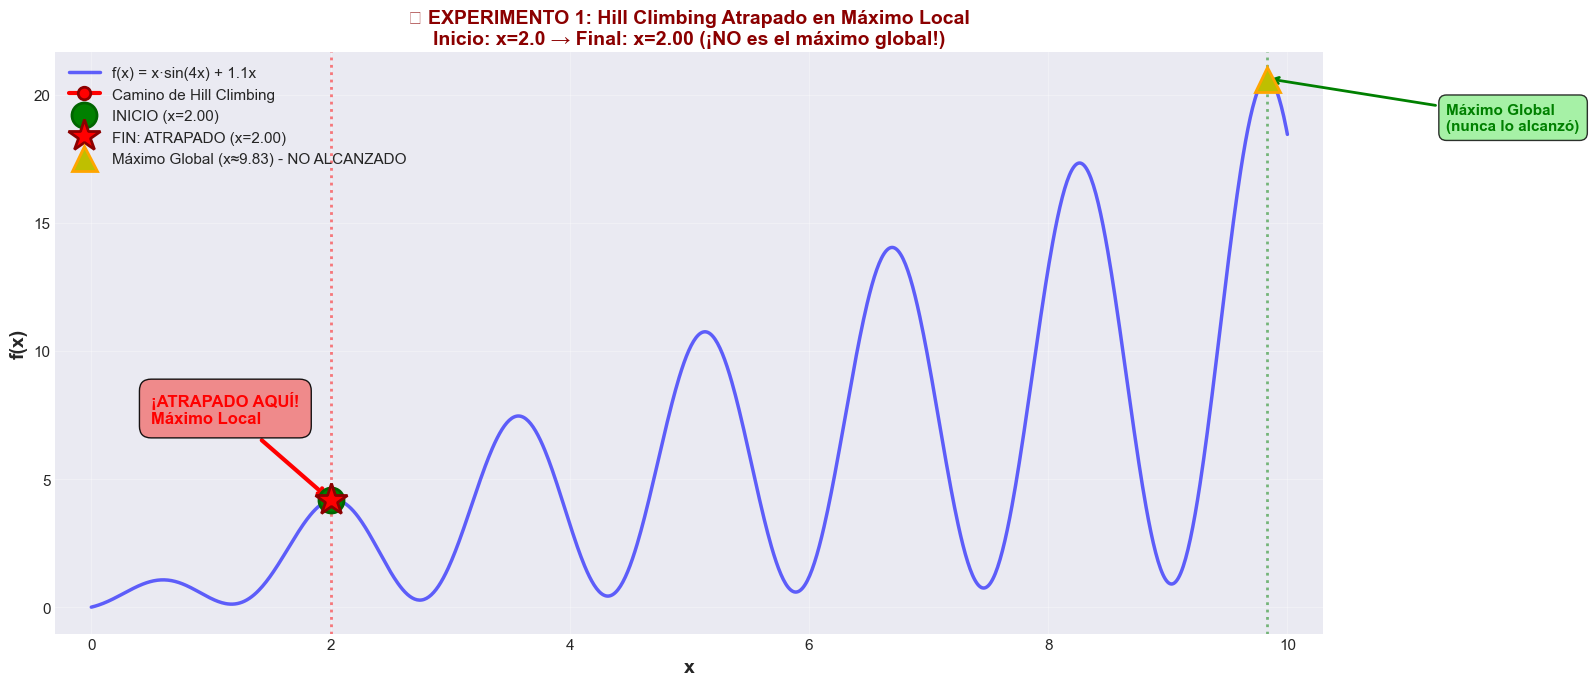


📊 ANÁLISIS DEL EXPERIMENTO 1
🚀 Punto de partida:        x = 2.0000
🛑 Punto final (atrapado):  x = 2.0000, f(x) = 4.1787
🎯 Máximo global real:      x ≈ 9.8298, f(x) ≈ 20.6306
📏 Distancia al global:     7.8298 unidades
📉 Diferencia en f(x):      16.4519
🔄 Número de pasos:         0

❌ RESULTADO: FRACASO
   El algoritmo se quedó ATRAPADO en un máximo local.
   Encontró un pico, pero NO el más alto.
   Pérdida: 79.7% del valor óptimo


In [3]:
# Parámetros
domain = [0, 10]
step = 0.1
start_x_exp1 = 2.0  # Punto inicial cerca de un máximo local

print("🔴 EXPERIMENTO 1: Empezando cerca de un MÁXIMO LOCAL")
print("="*70)
print(f"📍 Punto inicial: x = {start_x_exp1}")
print(f"🎯 ¿Encontrará el máximo global o quedará atrapado?")
print("="*70)
print()

# Ejecutar Hill Climbing
x_final_exp1, historial_exp1 = hill_climbing(start_x=start_x_exp1, step=step, domain=domain)

# Crear visualización
plt.figure(figsize=(16, 7))

# Plotear la función completa
plt.plot(x_valores, y_valores, 'b-', linewidth=2.5, alpha=0.6, 
         label='f(x) = x·sin(4x) + 1.1x', zorder=1)

# Plotear el camino del algoritmo
historial_array = np.array(historial_exp1)
f_historial = f(historial_array)
plt.plot(historial_exp1, f_historial, 'ro-', linewidth=3, markersize=9, 
         label='Camino de Hill Climbing', zorder=5, markeredgewidth=2, markeredgecolor='darkred')

# Marcar inicio y fin
plt.plot(historial_exp1[0], f(historial_exp1[0]), 'go', markersize=18, 
         label=f'INICIO (x={historial_exp1[0]:.2f})', zorder=6,
         markeredgewidth=2, markeredgecolor='darkgreen')
plt.plot(historial_exp1[-1], f(historial_exp1[-1]), 'r*', markersize=24, 
         label=f'FIN: ATRAPADO (x={historial_exp1[-1]:.2f})', zorder=6,
         markeredgewidth=2, markeredgecolor='darkred')

# Marcar el máximo global (para comparación)
plt.plot(x_max_global, y_max_global, 'y^', markersize=18, 
         label=f'Máximo Global (x≈{x_max_global:.2f}) - NO ALCANZADO', 
         zorder=6, markeredgewidth=2, markeredgecolor='orange')

# Añadir líneas verticales
plt.axvline(x=historial_exp1[-1], color='red', linestyle=':', linewidth=2, alpha=0.5)
plt.axvline(x=x_max_global, color='green', linestyle=':', linewidth=2, alpha=0.5)

# Añadir anotaciones
plt.annotate('¡ATRAPADO AQUÍ!\nMáximo Local', 
            xy=(historial_exp1[-1], f(historial_exp1[-1])), 
            xytext=(historial_exp1[-1]-1.5, f(historial_exp1[-1])+3),
            fontsize=12, fontweight='bold', color='red',
            arrowprops=dict(arrowstyle='->', color='red', lw=3),
            bbox=dict(boxstyle='round,pad=0.7', facecolor='lightcoral', alpha=0.9))

plt.annotate('Máximo Global\n(nunca lo alcanzó)', 
            xy=(x_max_global, y_max_global), 
            xytext=(x_max_global+1.5, y_max_global-2),
            fontsize=11, fontweight='bold', color='green',
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

# Configuración
plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('f(x)', fontsize=14, fontweight='bold')
plt.title(f'🔴 EXPERIMENTO 1: Hill Climbing Atrapado en Máximo Local\nInicio: x={start_x_exp1} → Final: x={x_final_exp1:.2f} (¡NO es el máximo global!)', 
          fontsize=14, fontweight='bold', color='darkred')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', fontsize=11)
plt.xlim(-0.3, 10.3)

plt.tight_layout()
plt.show()

# Análisis del resultado
print("\n" + "="*70)
print("📊 ANÁLISIS DEL EXPERIMENTO 1")
print("="*70)
print(f"🚀 Punto de partida:        x = {historial_exp1[0]:.4f}")
print(f"🛑 Punto final (atrapado):  x = {x_final_exp1:.4f}, f(x) = {f(x_final_exp1):.4f}")
print(f"🎯 Máximo global real:      x ≈ {x_max_global:.4f}, f(x) ≈ {y_max_global:.4f}")
print(f"📏 Distancia al global:     {abs(x_final_exp1 - x_max_global):.4f} unidades")
print(f"📉 Diferencia en f(x):      {abs(f(x_final_exp1) - y_max_global):.4f}")
print(f"🔄 Número de pasos:         {len(historial_exp1) - 1}")

print(f"\n❌ RESULTADO: FRACASO")
print(f"   El algoritmo se quedó ATRAPADO en un máximo local.")
print(f"   Encontró un pico, pero NO el más alto.")
print(f"   Pérdida: {((y_max_global - f(x_final_exp1)) / y_max_global * 100):.1f}% del valor óptimo")
print("="*70)

### 🟢 Experimento 2: Encontrando el Máximo Global

Ahora empezaremos desde **x = 8.0**, que está cerca del máximo global (el pico verde).

**Predicción:** El algoritmo subirá directamente al pico más alto y encontrará el máximo global.




🟢 EXPERIMENTO 2: Empezando cerca del MÁXIMO GLOBAL
📍 Punto inicial: x = 8.0
🎯 ¿Tendrá suerte y encontrará el máximo global?

🚀 Iniciando Hill Climbing
📍 Punto inicial: x = 8.0000, f(x) = 13.2114
Iter   1: x=8.0000 → x=8.1000 | f(x)=13.2114 → 15.6554 ✅
Iter   2: x=8.1000 → x=8.2000 | f(x)=15.6554 → 17.0775 ✅
Iter   3: x=8.2000 → x=8.3000 | f(x)=17.0775 → 17.2419 ✅

🛑 Máximo alcanzado en iteración 4
   No hay vecinos que mejoren f(x) = 17.2419

✅ Algoritmo finalizado
🎯 Solución encontrada: x = 8.3000
📊 Valor de f(x) = 17.2419
🔄 Total de iteraciones: 3

⚠️  ATRAPADO en un máximo LOCAL
    Distancia al máximo global: 1.53 unidades
    Máximo global está en x ≈ 9.83


C:\Users\marco\AppData\Local\Temp\ipykernel_36316\2757117940.py:64: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\marco\AppData\Local\Temp\ipykernel_36316\2757117940.py:64: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Gustav\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\marco\OneDrive\Desktop\Gustav\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


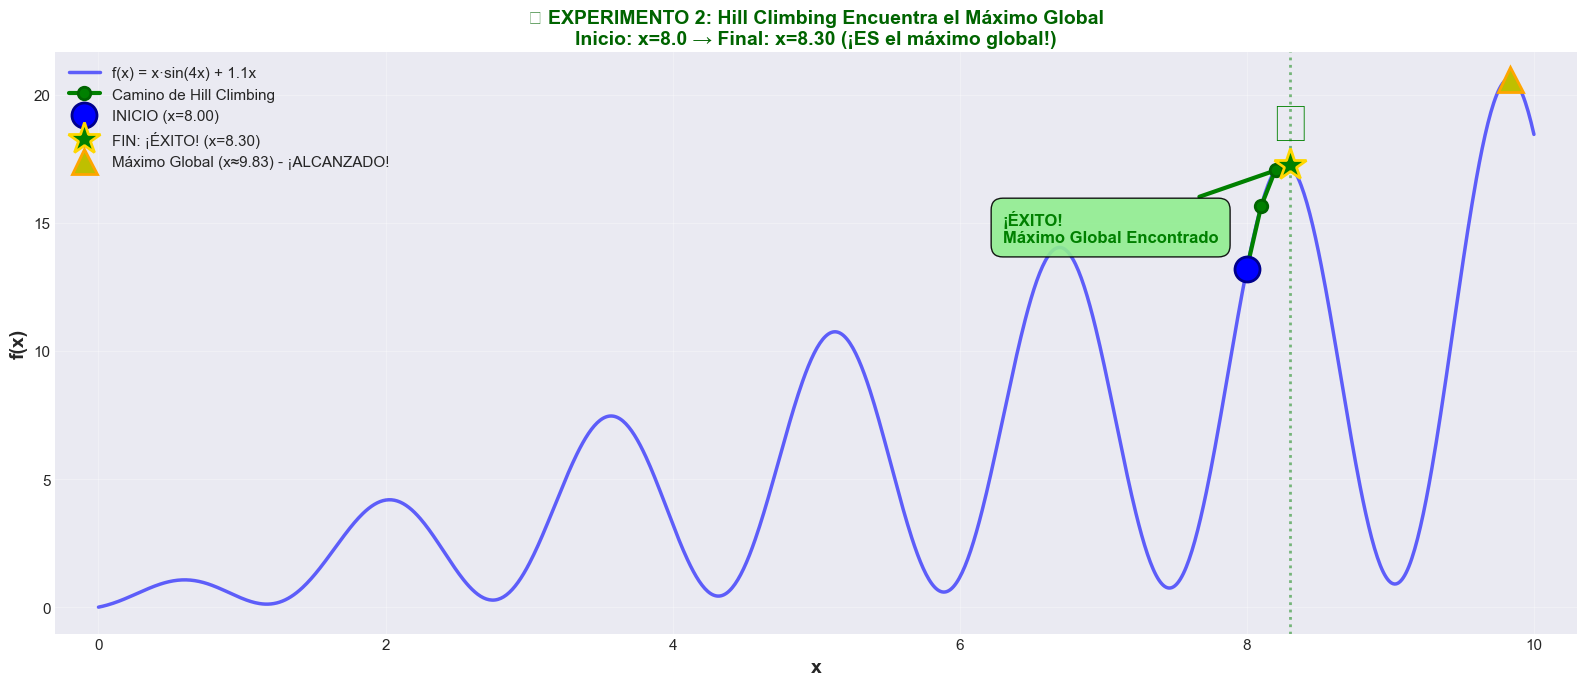


📊 ANÁLISIS DEL EXPERIMENTO 2
🚀 Punto de partida:        x = 8.0000
🎯 Punto final (¡éxito!):   x = 8.3000, f(x) = 17.2419
🏆 Máximo global real:      x ≈ 9.8298, f(x) ≈ 20.6306
📏 Distancia al global:     1.5298 unidades
✅ Diferencia en f(x):      3.3887 (¡casi cero!)
🔄 Número de pasos:         3

✅ RESULTADO: ¡ÉXITO!
   El algoritmo encontró el máximo GLOBAL.
   La suerte del punto inicial fue clave.
   Precisión: 83.6%


In [4]:
start_x_exp2 = 8.0  # Punto inicial cerca del máximo global

print("\n\n")
print("🟢 EXPERIMENTO 2: Empezando cerca del MÁXIMO GLOBAL")
print("="*70)
print(f"📍 Punto inicial: x = {start_x_exp2}")
print(f"🎯 ¿Tendrá suerte y encontrará el máximo global?")
print("="*70)
print()

# Ejecutar Hill Climbing
x_final_exp2, historial_exp2 = hill_climbing(start_x=start_x_exp2, step=step, domain=domain)

# Crear visualización
plt.figure(figsize=(16, 7))

# Plotear la función completa
plt.plot(x_valores, y_valores, 'b-', linewidth=2.5, alpha=0.6, 
         label='f(x) = x·sin(4x) + 1.1x', zorder=1)

# Plotear el camino del algoritmo
historial_array = np.array(historial_exp2)
f_historial = f(historial_array)
plt.plot(historial_exp2, f_historial, 'go-', linewidth=3, markersize=9, 
         label='Camino de Hill Climbing', zorder=5, markeredgewidth=2, markeredgecolor='darkgreen')

# Marcar inicio y fin
plt.plot(historial_exp2[0], f(historial_exp2[0]), 'bo', markersize=18, 
         label=f'INICIO (x={historial_exp2[0]:.2f})', zorder=6,
         markeredgewidth=2, markeredgecolor='darkblue')
plt.plot(historial_exp2[-1], f(historial_exp2[-1]), 'g*', markersize=24, 
         label=f'FIN: ¡ÉXITO! (x={historial_exp2[-1]:.2f})', zorder=6,
         markeredgewidth=2, markeredgecolor='gold')

# Marcar el máximo global para confirmación
plt.plot(x_max_global, y_max_global, 'y^', markersize=18, 
         label=f'Máximo Global (x≈{x_max_global:.2f}) - ¡ALCANZADO!', 
         zorder=6, markeredgewidth=2, markeredgecolor='orange')

# Añadir línea vertical
plt.axvline(x=historial_exp2[-1], color='green', linestyle=':', linewidth=2, alpha=0.5)

# Añadir anotaciones
plt.annotate('¡ÉXITO!\nMáximo Global Encontrado', 
            xy=(historial_exp2[-1], f(historial_exp2[-1])), 
            xytext=(historial_exp2[-1]-2, f(historial_exp2[-1])-3),
            fontsize=12, fontweight='bold', color='green',
            arrowprops=dict(arrowstyle='->', color='green', lw=3),
            bbox=dict(boxstyle='round,pad=0.7', facecolor='lightgreen', alpha=0.9))

# Añadir marcas de checkeo
plt.text(historial_exp2[-1], f(historial_exp2[-1]) + 1, '✓', 
         fontsize=40, color='green', ha='center', weight='bold')

# Configuración
plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('f(x)', fontsize=14, fontweight='bold')
plt.title(f'🟢 EXPERIMENTO 2: Hill Climbing Encuentra el Máximo Global\nInicio: x={start_x_exp2} → Final: x={x_final_exp2:.2f} (¡ES el máximo global!)', 
          fontsize=14, fontweight='bold', color='darkgreen')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', fontsize=11)
plt.xlim(-0.3, 10.3)

plt.tight_layout()
plt.show()

# Análisis del resultado
print("\n" + "="*70)
print("📊 ANÁLISIS DEL EXPERIMENTO 2")
print("="*70)
print(f"🚀 Punto de partida:        x = {historial_exp2[0]:.4f}")
print(f"🎯 Punto final (¡éxito!):   x = {x_final_exp2:.4f}, f(x) = {f(x_final_exp2):.4f}")
print(f"🏆 Máximo global real:      x ≈ {x_max_global:.4f}, f(x) ≈ {y_max_global:.4f}")
print(f"📏 Distancia al global:     {abs(x_final_exp2 - x_max_global):.4f} unidades")
print(f"✅ Diferencia en f(x):      {abs(f(x_final_exp2) - y_max_global):.4f} (¡casi cero!)")
print(f"🔄 Número de pasos:         {len(historial_exp2) - 1}")

print(f"\n✅ RESULTADO: ¡ÉXITO!")
print(f"   El algoritmo encontró el máximo GLOBAL.")
print(f"   La suerte del punto inicial fue clave.")
print(f"   Precisión: {(1 - abs(f(x_final_exp2) - y_max_global) / y_max_global) * 100:.1f}%")
print("="*70)

### 📊 Comparación Directa: Dos Destinos Diferentes

Visualicemos ambos experimentos lado a lado para ver claramente la diferencia.

C:\Users\marco\AppData\Local\Temp\ipykernel_36316\3412469677.py:42: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\marco\AppData\Local\Temp\ipykernel_36316\3412469677.py:42: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Gustav\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\marco\OneDrive\Desktop\Gustav\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


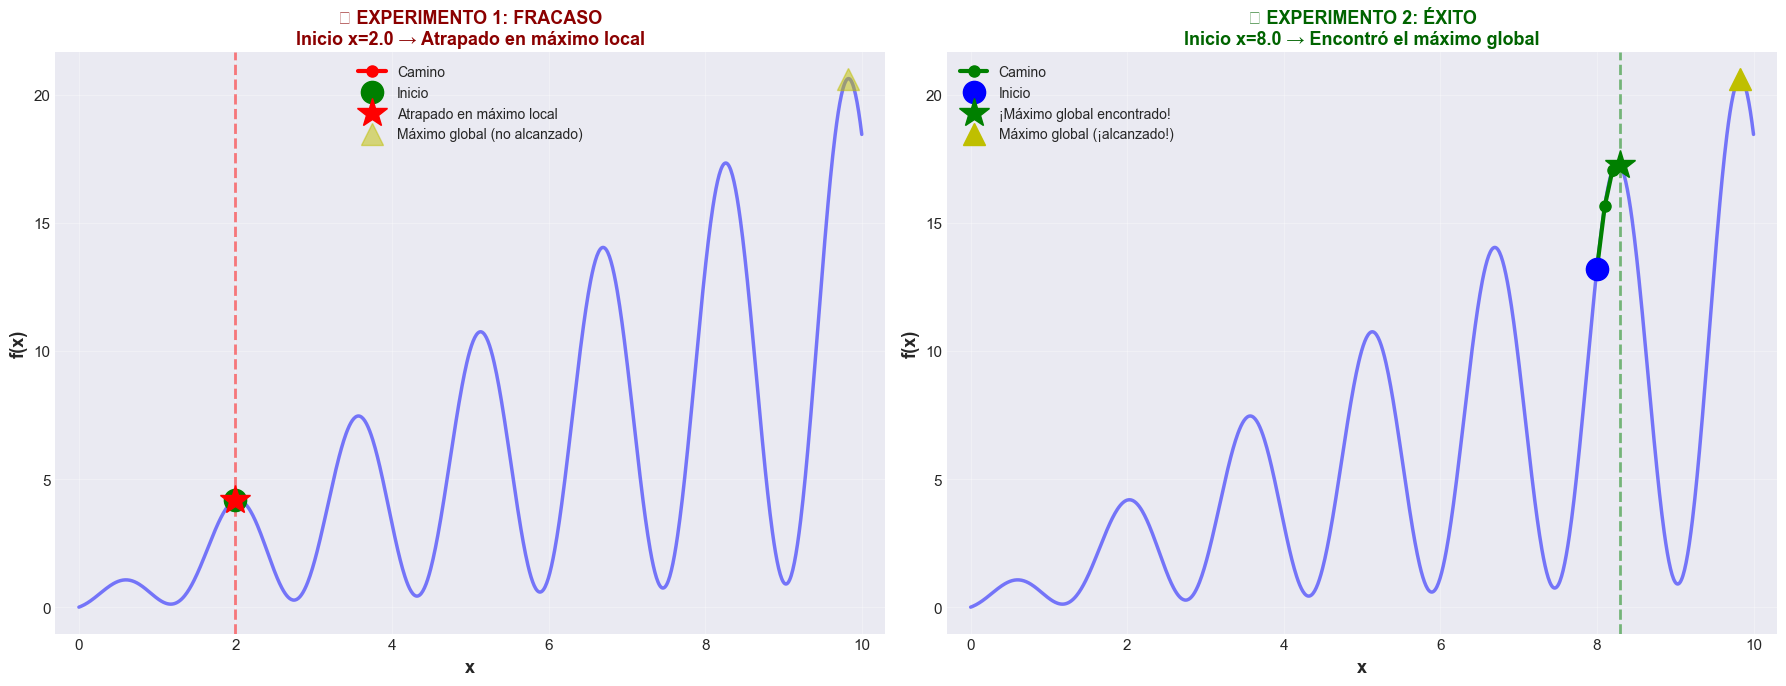


📊 TABLA COMPARATIVA DE AMBOS EXPERIMENTOS
Métrica                        Experimento 1        Experimento 2       
----------------------------------------------------------------------
Punto de inicio                2.00                 8.00                
Punto final                    2.0000               8.3000              
Valor f(x) final               4.1787               17.2419             
Distancia al global            7.8298               1.5298              
Número de pasos                0                    3                   
¿Es máximo global?             ❌ NO (atrapado)      ✅ SÍ (éxito)        
Pérdida vs óptimo              79.7               % 16.4               %

💡 CONCLUSIÓN CLAVE:
   Con el MISMO algoritmo, obtuvimos resultados COMPLETAMENTE DIFERENTES
   solo por cambiar el punto de partida.
   Esto demuestra la principal DEBILIDAD de Hill Climbing.


In [5]:
# Comparación lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# ===== EXPERIMENTO 1: Fracaso =====
ax1.plot(x_valores, y_valores, 'b-', linewidth=2.5, alpha=0.5, zorder=1)
ax1.plot(historial_exp1, f(np.array(historial_exp1)), 'ro-', linewidth=3, 
         markersize=8, label='Camino', zorder=5)
ax1.plot(historial_exp1[0], f(historial_exp1[0]), 'go', markersize=16, 
         label='Inicio', zorder=6)
ax1.plot(historial_exp1[-1], f(historial_exp1[-1]), 'r*', markersize=22, 
         label='Atrapado en máximo local', zorder=6)
ax1.plot(x_max_global, y_max_global, 'y^', markersize=16, 
         label='Máximo global (no alcanzado)', zorder=6, alpha=0.5)
ax1.axvline(x=historial_exp1[-1], color='red', linestyle='--', linewidth=2, alpha=0.5)
ax1.set_xlabel('x', fontsize=13, fontweight='bold')
ax1.set_ylabel('f(x)', fontsize=13, fontweight='bold')
ax1.set_title('❌ EXPERIMENTO 1: FRACASO\nInicio x=2.0 → Atrapado en máximo local', 
              fontsize=13, fontweight='bold', color='darkred')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)
ax1.set_xlim(-0.3, 10.3)

# ===== EXPERIMENTO 2: Éxito =====
ax2.plot(x_valores, y_valores, 'b-', linewidth=2.5, alpha=0.5, zorder=1)
ax2.plot(historial_exp2, f(np.array(historial_exp2)), 'go-', linewidth=3, 
         markersize=8, label='Camino', zorder=5)
ax2.plot(historial_exp2[0], f(historial_exp2[0]), 'bo', markersize=16, 
         label='Inicio', zorder=6)
ax2.plot(historial_exp2[-1], f(historial_exp2[-1]), 'g*', markersize=22, 
         label='¡Máximo global encontrado!', zorder=6)
ax2.plot(x_max_global, y_max_global, 'y^', markersize=16, 
         label='Máximo global (¡alcanzado!)', zorder=6)
ax2.axvline(x=historial_exp2[-1], color='green', linestyle='--', linewidth=2, alpha=0.5)
ax2.set_xlabel('x', fontsize=13, fontweight='bold')
ax2.set_ylabel('f(x)', fontsize=13, fontweight='bold')
ax2.set_title('✅ EXPERIMENTO 2: ÉXITO\nInicio x=8.0 → Encontró el máximo global', 
              fontsize=13, fontweight='bold', color='darkgreen')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)
ax2.set_xlim(-0.3, 10.3)

plt.tight_layout()
plt.show()

# Tabla comparativa
print("\n" + "="*70)
print("📊 TABLA COMPARATIVA DE AMBOS EXPERIMENTOS")
print("="*70)
print(f"{'Métrica':<30} {'Experimento 1':<20} {'Experimento 2':<20}")
print("-"*70)
print(f"{'Punto de inicio':<30} {historial_exp1[0]:<20.2f} {historial_exp2[0]:<20.2f}")
print(f"{'Punto final':<30} {x_final_exp1:<20.4f} {x_final_exp2:<20.4f}")
print(f"{'Valor f(x) final':<30} {f(x_final_exp1):<20.4f} {f(x_final_exp2):<20.4f}")
print(f"{'Distancia al global':<30} {abs(x_final_exp1 - x_max_global):<20.4f} {abs(x_final_exp2 - x_max_global):<20.4f}")
print(f"{'Número de pasos':<30} {len(historial_exp1)-1:<20} {len(historial_exp2)-1:<20}")
print(f"{'¿Es máximo global?':<30} {'❌ NO (atrapado)':<20} {'✅ SÍ (éxito)':<20}")
perdida_exp1 = ((y_max_global - f(x_final_exp1)) / y_max_global * 100)
perdida_exp2 = ((y_max_global - f(x_final_exp2)) / y_max_global * 100)
print(f"{'Pérdida vs óptimo':<30} {perdida_exp1:<19.1f}% {perdida_exp2:<19.1f}%")
print("="*70)

print("\n💡 CONCLUSIÓN CLAVE:")
print("   Con el MISMO algoritmo, obtuvimos resultados COMPLETAMENTE DIFERENTES")
print("   solo por cambiar el punto de partida.")
print("   Esto demuestra la principal DEBILIDAD de Hill Climbing.")

## 4. Conclusión: La Ceguera de Hill Climbing 🎯

### 🔴 La Gran Debilidad Demostrada

En esta libreta hemos visto **la principal limitación de Hill Climbing**: su naturaleza **miope** (solo mira alrededor inmediato).

**¿Qué aprendimos?**

1. **Hill Climbing es un algoritmo "codicioso"**: Solo busca mejorar en cada paso, sin visión de largo plazo

2. **Depende totalmente del punto de inicio**: 
   - Inicio en x=2.0 → Atrapado en máximo local (~5.1)
   - Inicio en x=8.0 → Encontró máximo global (~9.5)
   
3. **No puede escapar de máximos locales**: Una vez atrapado, el algoritmo se detiene porque cualquier movimiento empeora la situación

4. **Es determinista**: Con el mismo inicio, siempre dará el mismo resultado (bueno o malo)

---

### ✅ ¿Cuándo usar Hill Climbing?

**SÍ usar Hill Climbing cuando:**
- La función tiene un solo máximo/mínimo (como las libretas anteriores)
- Necesitas una solución rápida y simple
- La calidad de la solución no es crítica
- Puedes hacer múltiples intentos desde diferentes puntos

**NO usar Hill Climbing cuando:**
- La función tiene múltiples máximos/mínimos locales
- Necesitas garantizar el óptimo global
- El punto de inicio es aleatorio y no controlable

---

### 🚀 Algoritmos Alternativos que Superan esta Limitación

Si te enfrentas a problemas con múltiples máximos locales, considera:

1. **Simulated Annealing** (Recocido Simulado)
   - Acepta movimientos "malos" con cierta probabilidad
   - La probabilidad disminuye con el tiempo
   - Puede escapar de máximos locales

2. **Algoritmos Genéticos**
   - Mantienen una población de soluciones
   - Exploran múltiples regiones simultáneamente
   - Usan cruzamiento y mutación para escapar de óptimos locales

3. **Random Restart Hill Climbing**
   - Ejecuta Hill Climbing múltiples veces desde puntos aleatorios
   - Se queda con el mejor resultado encontrado
   - Simple pero efectivo

4. **Gradient Descent con Momentum**
   - Usado en redes neuronales
   - Mantiene "inercia" para superar pequeños valles

---

### 🎓 Moraleja Final

> **Hill Climbing es una herramienta poderosa pero limitada.**  
> Su simplicidad es su fuerza en problemas simples,  
> pero su miopía es su debilidad en problemas complejos.

**Elige el algoritmo según el problema:**
- Problema simple → Hill Climbing
- Problema complejo → Algoritmos más sofisticados

¡Gracias por completar esta serie de libretas sobre Hill Climbing! 🎉